# Large sample simulation

## Scalable method

Should work with qubits < 300

In [1]:
from scalable_class import ScalableEstimate
import numpy as np

scalable = ScalableEstimate(
    qubit_list=np.arange(2, 7),
    optimization_lvl='high',
    error_name='TQ Dep',
    error_list=np.arange(0.001, 0.05, 0.005),
)
scalable.run('avg')

In [2]:
scalable.table('act')

,2,3,4,5,6
0.001,0.790950,0.844933,0.832443,0.846205,0.834694
0.006,0.782972,0.828360,0.800714,0.803008,0.768808
0.011,0.775570,0.813423,0.773796,0.767581,0.719332
0.016,0.768517,0.799537,0.750053,0.737299,0.680316
0.021,0.761727,0.786470,0.728778,0.710971,0.648909
0.026,0.755155,0.774097,0.709559,0.687877,0.623344
0.031,0.748779,0.762342,0.692119,0.667518,0.602401
0.036,0.742583,0.751156,0.676253,0.649517,0.585175
0.041,0.736558,0.740500,0.661798,0.633574,0.570967
0.046,0.730701,0.730349,0.648624,0.619442,0.559233


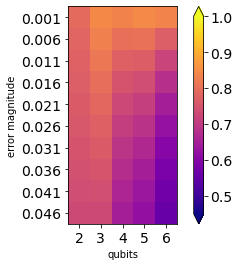

In [3]:
scalable.plot('act')

## Numerical simulation
Should work with < 10 qubits

In [4]:
from numerical_class import NumericalEstimate

numeric = NumericalEstimate(
    qubit_list=np.arange(2, 7),
    optimization_lvl='high',
    error_name='TQ Dep',
    error_list=np.arange(0.001, 0.05, 0.005),
    ntrials=100
)
numeric.run()

finished n=2, time=0:00:14.077456
finished n=3, time=0:00:18.879046
finished n=4, time=0:00:33.232317
finished n=5, time=0:00:41.135369
finished n=6, time=0:01:09.541254


In [5]:
numeric.table('act')

,2,3,4,5,6
0.001,0.777087,0.847580,0.834209,0.846933,0.833927
0.006,0.767925,0.833683,0.802631,0.807924,0.766762
0.011,0.760611,0.819934,0.774902,0.775420,0.716733
0.016,0.754754,0.806482,0.752166,0.748345,0.679033
0.021,0.747200,0.792922,0.731231,0.724725,0.649209
0.026,0.739765,0.782067,0.712258,0.702554,0.624306
0.031,0.733781,0.770620,0.695778,0.683020,0.604557
0.036,0.727120,0.757208,0.679777,0.665158,0.588120
0.041,0.720249,0.746966,0.665743,0.649213,0.574306
0.046,0.714574,0.738332,0.653770,0.635833,0.563220


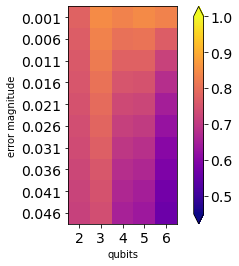

In [6]:
numeric.plot('act')

## Confidence interval comparison

In [7]:
from confidence_interval_funcs import run_sample

success, lower, coverage = analyze_confidence_intervals(
    numeric.act_success,
    ns_list=[1, 10, 100],
    nc_list=[100, 200, 300],
    reps=100
)

In [10]:
coverage['bootstrap'][2, 0.001]

{(100, 1): 0.94,
 (100, 10): 0.98,
 (100, 100): 0.97,
 (200, 1): 0.98,
 (200, 10): 0.99,
 (200, 100): 0.98,
 (300, 1): 0.97,
 (300, 10): 0.99,
 (300, 100): 0.98}

In [11]:
coverage['original'][2, 0.001]

{(100, 1): 0.94,
 (100, 10): 1.0,
 (100, 100): 1.0,
 (200, 1): 0.99,
 (200, 10): 1.0,
 (200, 100): 1.0,
 (300, 1): 0.97,
 (300, 10): 1.0,
 (300, 100): 1.0}

## Estimate passing error magnitudes

QVEstimate heavy output frequencies must be above and below the specified threshold.

In [14]:
from utils import passing_error_estimate

scalable_estimate = passing_error_estimate(scalable, 6, threshold=2/3)
numeric_estimate = passing_error_estimate(numeric, 6, threshold=2/3)

print(f'Error magnitude threhsold (scalable) = {scalable_estimate: .6f}')
print(f'Error magnitude threhsold (numeric)  = {numeric_estimate: .6f}')

Error magnitude threhsold (scalable) =  0.018044
Error magnitude threhsold (numeric)  =  0.017954
